## En este cuaderno se muestran algunos ejemplos del nivel de prosamiento de Tokenización y Segmentación

Descarga de datos desde el proyecto Gutenberg, en concreto el Quijote

In [16]:
from urllib import request
URL_LIBRO = "http://www.gutenberg.org/cache/epub/2000/pg2000.txt"
file_book = request.urlopen(URL_LIBRO)
raw_book = file_book.read().decode("utf-8")
print(raw_book[500:550])

* START OF THIS PROJECT GUTENBERG EBOOK DON QUIJOT


Ejemplo de segmentación

In [17]:
from nltk import sent_tokenize
sents_book = sent_tokenize(raw_book, language="spanish")
print("5 oraciones del libro descargado: %s" % "\n".join(sents_book[500:505]))
n_sents = len(sents_book)
print("\nNº. de oraciones: %d" % n_sents)

5 oraciones del libro descargado: -Aquellos que allí ves -respondió su amo- de los brazos largos, que los
suelen tener algunos de casi dos leguas.
-Mire vuestra merced -respondió Sancho- que aquellos que allí se parecen no
son gigantes, sino molinos de viento, y lo que en ellos parecen brazos son
las aspas, que, volteadas del viento, hacen andar la piedra del molino.
-Bien parece -respondió don Quijote- que no estás cursado en esto de las
aventuras: ellos son gigantes; y si tienes miedo, quítate de ahí, y ponte
en oración en el espacio que yo voy a entrar con ellos en fiera y desigual
batalla.
Y, diciendo esto, dio de espuelas a su caballo Rocinante, sin atender a las
voces que su escudero Sancho le daba, advirtiéndole que, sin duda alguna,
eran molinos de viento, y no gigantes, aquellos que iba a acometer.
Pero él
iba tan puesto en que eran gigantes, que ni oía las voces de su escudero
Sancho ni echaba de ver, aunque estaba ya bien cerca, lo que eran; antes,
iba diciendo en voces alta

Ejemplo de Tokanización

In [18]:
from nltk.tokenize.treebank import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
sent_tokens = [tokenizer.tokenize(sent) for sent in sents_book]
print("Tokens de 5 oraciones: %s" % "\n".join(map(lambda x:", ".join(x), sent_tokens[500:505])))
n_words = 0
for sent in sents_book:
    n_words += len(sent)
print("\nNº. de palabras: %d" % n_words)

Tokens de 5 oraciones: -Aquellos, que, allí, ves, -respondió, su, amo-, de, los, brazos, largos, ,, que, los, suelen, tener, algunos, de, casi, dos, leguas, .
-Mire, vuestra, merced, -respondió, Sancho-, que, aquellos, que, allí, se, parecen, no, son, gigantes, ,, sino, molinos, de, viento, ,, y, lo, que, en, ellos, parecen, brazos, son, las, aspas, ,, que, ,, volteadas, del, viento, ,, hacen, andar, la, piedra, del, molino, .
-Bien, parece, -respondió, don, Quijote-, que, no, estás, cursado, en, esto, de, las, aventuras, :, ellos, son, gigantes, ;, y, si, tienes, miedo, ,, quítate, de, ahí, ,, y, ponte, en, oración, en, el, espacio, que, yo, voy, a, entrar, con, ellos, en, fiera, y, desigual, batalla, .
Y, ,, diciendo, esto, ,, dio, de, espuelas, a, su, caballo, Rocinante, ,, sin, atender, a, las, voces, que, su, escudero, Sancho, le, daba, ,, advirtiéndole, que, ,, sin, duda, alguna, ,, eran, molinos, de, viento, ,, y, no, gigantes, ,, aquellos, que, iba, a, acometer, .
Pero, él, iba

Cálculo de la bolsa de palabras (hay palabras repetidas). Se suelen pasar todas a minúscula.

In [22]:
bag_of_words = [word.lower() for sent in sent_tokens for word in sent]

Definición de función de cálculo y exposición de frecuencias en términos absolutos.

In [23]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
def calculo_frecuencias(bag_of_words):
    """Calcula frecuencias de las palabras y muestra una gráfica con las más frecuentes
    
    Args:
        bag_of_words: lista de strings
    """
    freq_dist = FreqDist(bag_of_words)
    print("Nº. objetos: %d"%freq_dist.N())
    print("Nº. objetos únicos: %d"%freq_dist.B())
    print("El objeto más frecuente es: %s" % str(freq_dist.max()))
    freq_dist.plot(50)

Frecuencias

Nº. objetos: 441846
Nº. objetos únicos: 25051
El objeto más frecuente es: ,


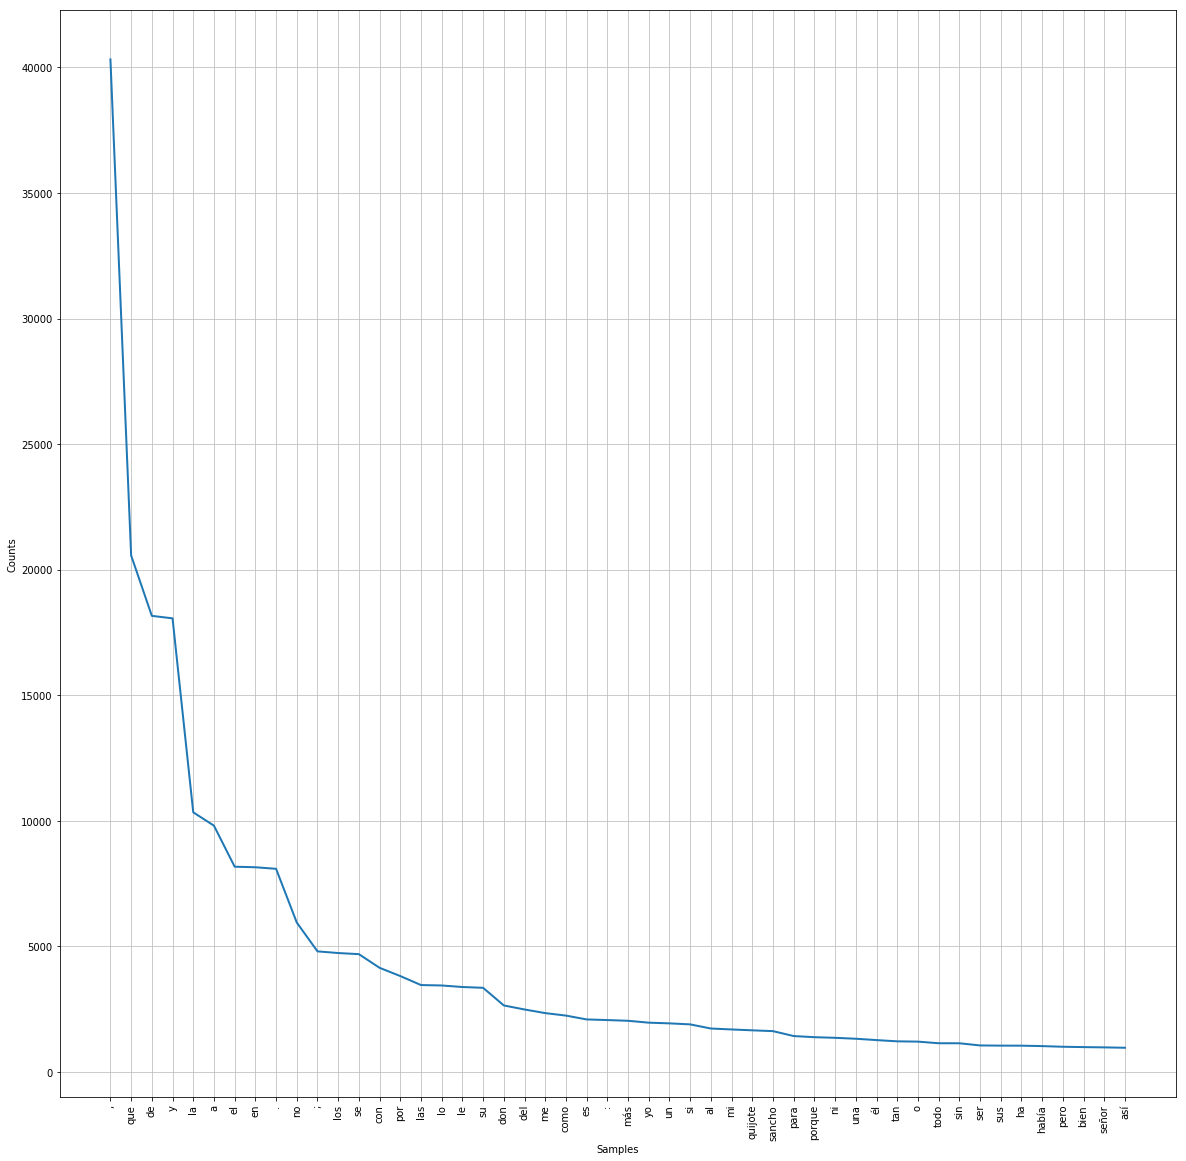

---------------------------


In [24]:
print("Frecuencias\n")
plt.figure(figsize=(20, 10))
calculo_frecuencias(bag_of_words)
print("---------------------------")

La palabras frecuentes son signos de puntuación y palabras vacías, veamos que ocurre si las quitamos.

In [26]:
import re
def rm_puntuation(bag_of_words):
    """Elimina los signos de puntuación.
    
    Args:
        bag_of_words: lista de strings.
        
    """
    re_puntuation = re.compile(r"""[\.,":;]""")
    bag_of_words_no_puntation = [word for word in bag_of_words if re_puntuation.fullmatch(word) is None]
    return bag_of_words_no_puntation

No signos de puntuación

Nº. objetos: 386567
Nº. objetos únicos: 25047
El objeto más frecuente es: que


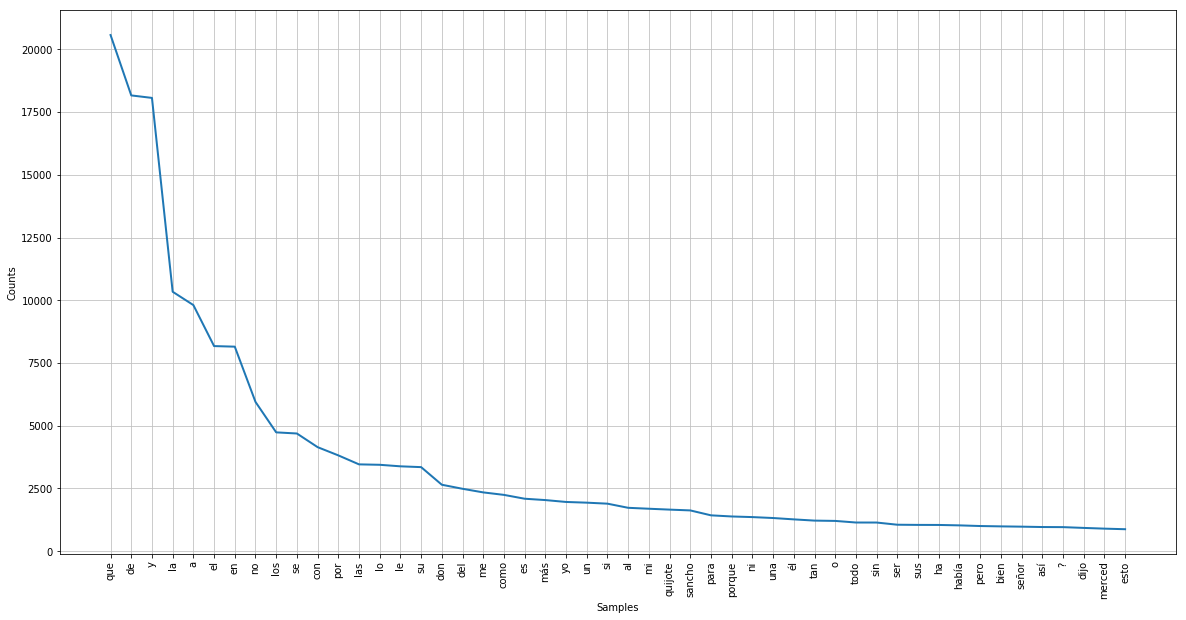

---------------------------


In [37]:
print("No signos de puntuación\n")
bag_of_words_no_puntuacion = rm_puntuation(bag_of_words)
plt.figure(figsize=(20, 10))
calculo_frecuencias(bag_of_words_no_puntuacion)
print("---------------------------")

In [40]:
from nltk.corpus import stopwords
def rm_stopwods(bag_of_words):
    """Elimina las stopwords del texto de entrada
    
    Args:
        sent_words_book: lista de strings.
    
    Returns:
        Una lista de listas de oraciones por palabras sin incluir las 
        palabras vacías.
    """
    spanish_stopwords = stopwords.words("spanish")
    no_stop_words = [word for word in bag_of_words if word not in spanish_stopwords]
    return no_stop_words

Stopper

Nº. objetos: 190765
Nº. objetos únicos: 24782
El objeto más frecuente es: don


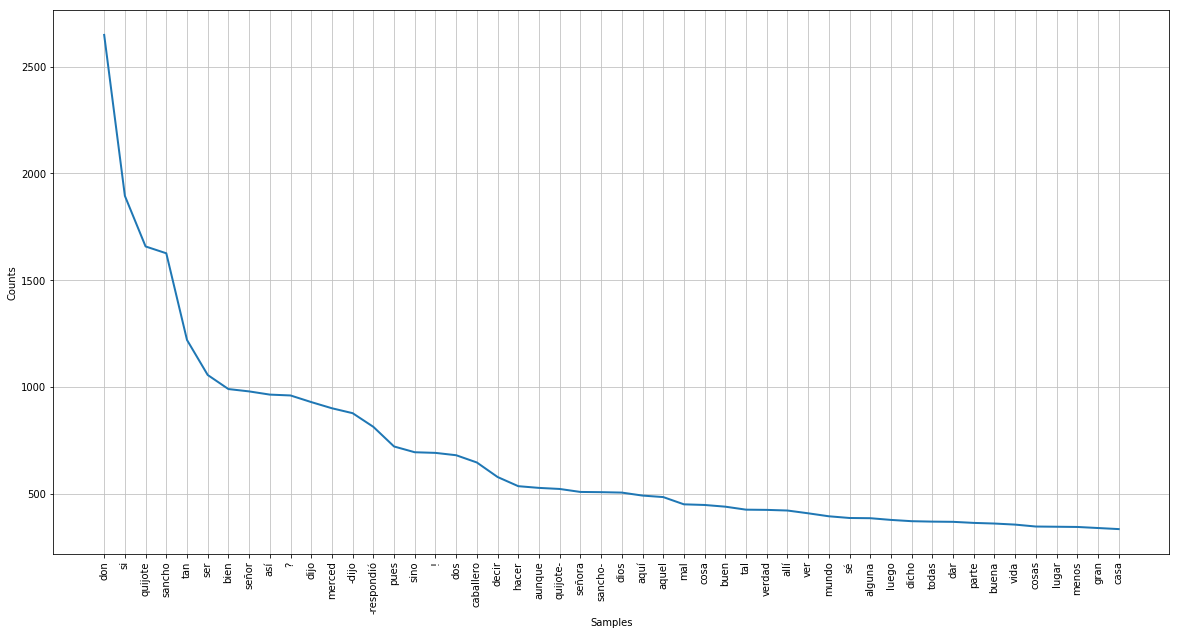

---------------------------


In [41]:
print("Stopper\n")
bag_of_words_no_puntuacion_no_stopper = rm_stopwods(bag_of_words_no_puntuacion)
plt.figure(figsize=(20, 10))
calculo_frecuencias(bag_of_words_no_puntuacion_no_stopper)
print("---------------------------")

Veamos lo que ocurre con Bigramas y Trigramas

Unigramas/Bigramas/Trigramas

Unigramas: curiel, burguillos, fe, buen, acogimiento, honra, hace, excelencia, toda, suerte
---------------------------
-Bigramas
Nº. objetos: 190764
Nº. objetos únicos: 153236
El objeto más frecuente es: ('don', 'quijote')


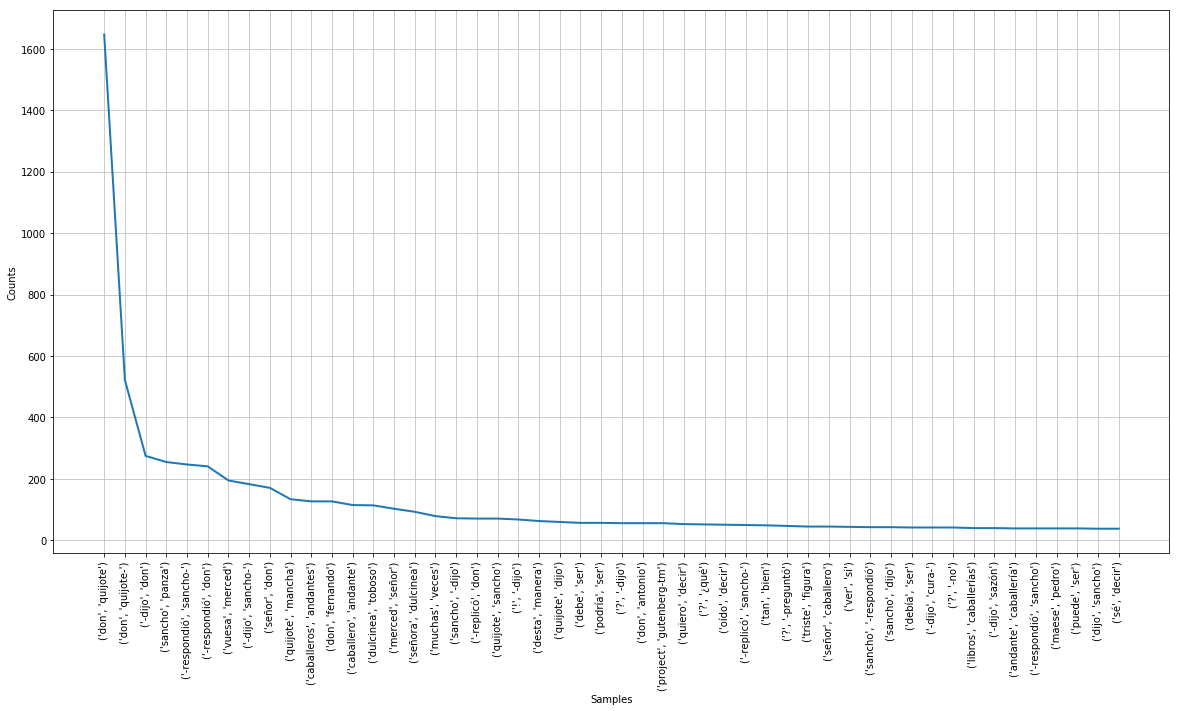

---------------------------
-Trigramas
Nº. objetos: 190763
Nº. objetos únicos: 183739
El objeto más frecuente es: ('-dijo', 'don', 'quijote-')


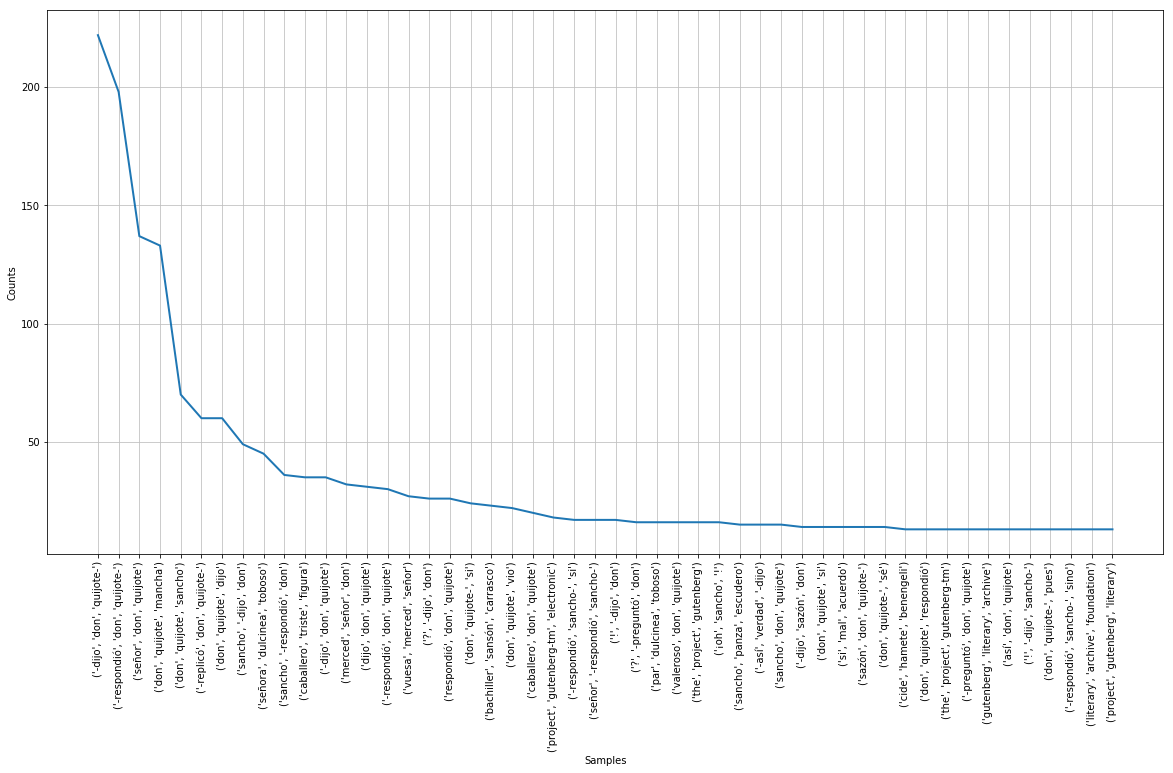

---------------------------


In [44]:
from nltk import bigrams
from nltk import trigrams
print("Unigramas/Bigramas/Trigramas\n")
    
print("Unigramas: %s" % ", ".join(bag_of_words_no_puntuacion_no_stopper[500:510]))
print("---------------------------")
print("-Bigramas")
plt.figure(figsize=(20, 10))
bag_of_bigrams = list(bigrams(bag_of_words_no_puntuacion_no_stopper))
calculo_frecuencias(bag_of_bigrams)
print("---------------------------")
print("-Trigramas")
bag_of_trigrams = trigrams(bag_of_words_no_puntuacion_no_stopper)
plt.figure(figsize=(20, 10))
calculo_frecuencias(bag_of_trigrams)
print("---------------------------")